Vytvořte klasifikátor pro 3 nejfrekventovanější skupiny, pro každou zvlášť.
- Zrealizujte v prostředí Orange a Jupyter.
- Doplňte úspěšnost klasifikace, přesnost, úplnost a f-score.
- Doplňte koeficient kappa pro danou klasifikaci. 
- Kolik je úspěšnost náhodného klasifikátoru pro danou úlohu.

V prostředí Orange relizováno na hodině, všechny základní parametry klasifikátoru jsou v uzlu _test and score_ a _confusion matrix_ v přiloženém souboru _classifiaction.ows_

In [2]:
import pandas as pd

data = pd.read_csv('lc-basket-01 1.tab', sep='\t', skiprows=[1])
data.head()

,cardid,value,pmethod,sex,homeown,income,age,fruitveg,freshmeat,dairy,cannedveg,cannedmeat,frozenmeal,beer,wine,softdrink,fish,confectionery
0,39808,42.7123,CHEQUE,M,NO,27000,46,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,67362,25.3567,CASH,Z,NO,30000,28,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,10872,20.6176,CASH,M,NO,13200,36,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN
3,26748,23.6883,CARD,Z,NO,12200,26,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,91609,18.8133,CARD,M,YES,11000,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
item_columns = data.columns[7:]
item_columns

Index(['fruitveg', 'freshmeat', 'dairy', 'cannedveg', 'cannedmeat',
       'frozenmeal', 'beer', 'wine', 'softdrink', 'fish', 'confectionery '],
      dtype='object')

In [4]:
group1_items = ['cannedveg', 'frozenmeal', 'beer']
group2_items = ['fruitveg', 'fish']
group3_items = ['frozenmeal', 'beer']

In [25]:
def contains_group(row, items):
    # 1 = nákup, 0/NaN = nenákup
    return all(row[item] == 1 for item in items)

import copy

# Vytvoření cílových proměnných (Target Variables)
data[item_columns] = data[item_columns].fillna(0).astype(float)
df_group1 = copy.deepcopy(data)
df_group2 = copy.deepcopy(data)
df_group3 = copy.deepcopy(data)

df_group1['Target_Group'] = data.apply(lambda row: contains_group(row, group1_items), axis=1).astype(int)
df_group2['Target_Group'] = data.apply(lambda row: contains_group(row, group2_items), axis=1).astype(int)
df_group3['Target_Group'] = data.apply(lambda row: contains_group(row, group3_items), axis=1).astype(int)

print(df_group1.head())

   cardid    value pmethod sex homeown  income  age  fruitveg  freshmeat  \
0   39808  42.7123  CHEQUE   M      NO   27000   46       0.0        1.0   
1   67362  25.3567    CASH   Z      NO   30000   28       0.0        1.0   
2   10872  20.6176    CASH   M      NO   13200   36       0.0        0.0   
3   26748  23.6883    CARD   Z      NO   12200   26       0.0        0.0   
4   91609  18.8133    CARD   M     YES   11000   24       0.0        0.0   

   dairy  cannedveg  cannedmeat  frozenmeal  beer  wine  softdrink  fish  \
0    1.0        0.0         0.0         0.0   0.0   0.0        0.0   0.0   
1    0.0        0.0         0.0         0.0   0.0   0.0        0.0   0.0   
2    0.0        1.0         0.0         1.0   1.0   0.0        0.0   1.0   
3    1.0        0.0         0.0         0.0   0.0   1.0        0.0   0.0   
4    0.0        0.0         0.0         0.0   0.0   0.0        0.0   0.0   

   confectionery   Target_Group  
0             1.0             0  
1             1.0 

In [26]:
from sklearn.model_selection import train_test_split

def classificator(df):
    y = df['Target_Group']
    X = df.drop(columns=['Target_Group', 'cardid'] + group1_items)

    # Změnit kategrické proměnné na dummy
    X = pd.get_dummies(X, columns=['pmethod', 'sex', 'homeown'], drop_first=True)

    return train_test_split(X, y, test_size=0.3, random_state=0)

X1_train, X1_test, y1_train, y1_test = classificator(df_group1)
X2_train, X2_test, y2_train, y2_test = classificator(df_group2)
X3_train, X3_test, y3_train, y3_test = classificator(df_group3)

In [27]:
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

tree1.fit(X1_train, y1_train)
tree2.fit(X2_train, y2_train)
tree3.fit(X3_train, y3_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [28]:
y1_pred = tree1.predict(X1_test)
y2_pred = tree2.predict(X2_test)
y3_pred = tree3.predict(X3_test)

In [29]:
from sklearn.metrics import accuracy_score
print(f'Přesnost pro skupinu 1: {accuracy_score(y1_test, y3_pred):.3f}')
print(f'Přesnost pro skupinu 2: {accuracy_score(y2_test, y3_pred):.3f}')
print(f'Přesnost pro skupinu 3: {accuracy_score(y3_test, y3_pred):.3f}')

Přesnost pro skupinu 1: 0.957
Přesnost pro skupinu 2: 0.753
Přesnost pro skupinu 3: 0.933


In [31]:
from sklearn.metrics import confusion_matrix
cmatrix1 = confusion_matrix(y1_test, y1_pred)
cmatrix2 = confusion_matrix(y2_test, y2_pred)
cmatrix3 = confusion_matrix(y3_test, y3_pred)

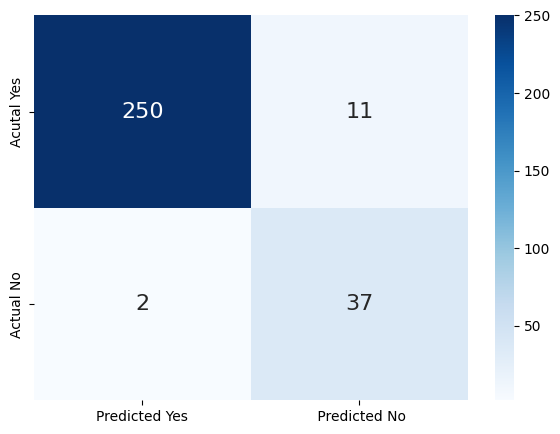

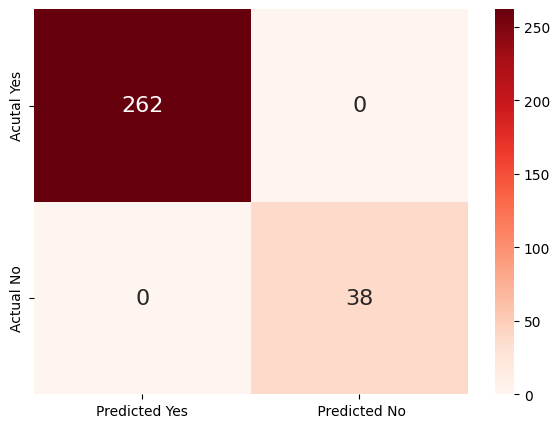

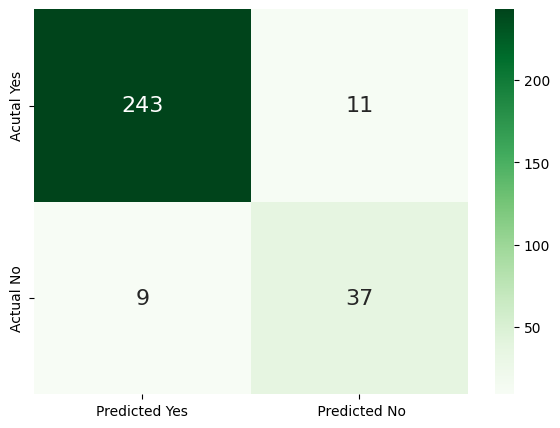

In [36]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cmatrix1, ["Acutal Yes", "Actual No"], ["Predicted Yes", " Predicted No"])
plt.figure(figsize = (7,5))
#sn.heatmap(df_cm, cmap="Greys", annot=True, annot_kws={"size": 16})
sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt="d")
#plt.savefig('dm-evaluate-orange-cmatrix.png')
plt.show()

df_cm = pd.DataFrame(cmatrix2, ["Acutal Yes", "Actual No"], ["Predicted Yes", " Predicted No"])
plt.figure(figsize = (7,5))
#sn.heatmap(df_cm, cmap="Greys", annot=True, annot_kws={"size": 16})
sn.heatmap(df_cm, cmap="Reds", annot=True, annot_kws={"size": 16}, fmt="d")
#plt.savefig('dm-evaluate-orange-cmatrix.png')
plt.show()

df_cm = pd.DataFrame(cmatrix3, ["Acutal Yes", "Actual No"], ["Predicted Yes", " Predicted No"])
plt.figure(figsize = (7,5))
#sn.heatmap(df_cm, cmap="Greys", annot=True, annot_kws={"size": 16})
sn.heatmap(df_cm, cmap="Greens", annot=True, annot_kws={"size": 16}, fmt="d")
#plt.savefig('dm-evaluate-orange-cmatrix.png')
plt.show()

In [33]:
from sklearn.metrics import precision_score

print(f'Přesnost skupiny 1: {precision_score(y1_test, y1_pred, average='weighted')}')
print(precision_score(y1_test, y1_pred, average=None))
print(f'Přesnost skupiny 2: {precision_score(y2_test, y2_pred, average='weighted')}')
print(precision_score(y2_test, y2_pred, average=None))
print(f'Přesnost skupiny 3: {precision_score(y3_test, y3_pred, average='weighted')}')
print(precision_score(y3_test, y3_pred, average=None))

Přesnost skupiny 1: 0.9633035714285715
[0.99206349 0.77083333]
Přesnost skupiny 2: 1.0
[1. 1.]
Přesnost skupiny 3: 0.9346230158730159
[0.96428571 0.77083333]


In [34]:
from sklearn.metrics import recall_score

print(f'Úplnost skupiny 1: {recall_score(y1_test, y1_pred, average='weighted')}')
print(recall_score(y1_test, y1_pred, average=None))
print(f'Úplnost skupiny 2: {recall_score(y2_test, y2_pred, average='weighted')}')
print(recall_score(y2_test, y2_pred, average=None))
print(f'Úplnost skupiny 3: {recall_score(y3_test, y3_pred, average='weighted')}')
print(recall_score(y3_test, y3_pred, average=None))

Úplnost skupiny 1: 0.9566666666666667
[0.95785441 0.94871795]
Úplnost skupiny 2: 1.0
[1. 1.]
Úplnost skupiny 3: 0.9333333333333333
[0.95669291 0.80434783]


In [35]:
from sklearn.metrics import f1_score

print(f1_score(y1_test, y1_pred, average=None))
print('F-score skupiny 1: {:.3f}'.format(f1_score(y1_test, y1_pred, average='weighted')))
print(f1_score(y2_test, y2_pred, average=None))
print('F-score skupiny 2: {:.3f}'.format(f1_score(y2_test, y2_pred, average='weighted')))
print(f1_score(y3_test, y3_pred, average=None))
print('F-score skupiny 3: {:.3f}'.format(f1_score(y3_test, y1_pred, average='weighted')))

[0.97465887 0.85057471]
F-score skupiny 1: 0.959
[1. 1.]
F-score skupiny 2: 1.000
[0.96047431 0.78723404]
F-score skupiny 3: 0.934


Výsledky v Orange i v Pythonu jsou velmi podobné. Ve všech případech je f-score na velmi vysoké hodnotě a to >0.9, vypadá to, že stromový klasifikátor se na této jendoduché úloze nepřeučil a fungoval by dobře při klasifikaci nových dat.